In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
plt.rcParams["figure.figsize"]=[10,8]
sns.set_theme(style="darkgrid")
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# 1.[Exploratory Data Analysis]

In [2]:
df=pd.read_csv('/content/ToyotaCorolla.csv')
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [3]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [4]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [5]:
df.dtypes

,0
Price,int64
Age_08_04,int64
KM,int64
Fuel_Type,object
HP,int64
Automatic,int64
cc,int64
Doors,int64
Cylinders,int64
Gears,int64


In [6]:
df.describe(include='object')

,Fuel_Type
count,1436
unique,3
top,Petrol
freq,1264


In [7]:
df['Fuel_Type'].value_counts()

,count
Fuel_Type,
Petrol,1264
Diesel,155
CNG,17


In [8]:
summary_stats = df.describe()
print(summary_stats)


              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.0

In [9]:
df['Fuel_Type'].replace({'Petrol':0,'Diesel':1,'CNG':2},inplace=True)

In [10]:
df['Fuel_Type'].value_counts()

,count
Fuel_Type,
0,1264
1,155
2,17


In [11]:
df.dtypes

,0
Price,int64
Age_08_04,int64
KM,int64
Fuel_Type,int64
HP,int64
Automatic,int64
cc,int64
Doors,int64
Cylinders,int64
Gears,int64


In [12]:
df.duplicated().sum()

np.int64(1)

In [13]:
df[df.duplicated(keep=False)]

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
112,24950,8,13253,1,116,0,2000,5,4,5,1320
113,24950,8,13253,1,116,0,2000,5,4,5,1320


In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.shape

(1435, 11)

In [16]:
df["Cylinders"].value_counts()

,count
Cylinders,
4,1435


In [17]:
df.drop(columns=['Cylinders'],inplace=True)


In [18]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,5,1165
1,13750,23,72937,1,90,0,2000,3,5,1165
2,13950,24,41711,1,90,0,2000,3,5,1165
3,14950,26,48000,1,90,0,2000,3,5,1165
4,13750,30,38500,1,90,0,2000,3,5,1170


In [19]:
df.isnull().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Gears,0
Weight,0


In [20]:
df.rename(columns={'Age_08_04':'Age'},inplace=True)

In [21]:
df.head()

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,5,1165
1,13750,23,72937,1,90,0,2000,3,5,1165
2,13950,24,41711,1,90,0,2000,3,5,1165
3,14950,26,48000,1,90,0,2000,3,5,1165
4,13750,30,38500,1,90,0,2000,3,5,1170


array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Age'}>, <Axes: title={'center': 'KM'}>],
       [<Axes: title={'center': 'Fuel_Type'}>,
        <Axes: title={'center': 'HP'}>,
        <Axes: title={'center': 'Automatic'}>],
       [<Axes: title={'center': 'cc'}>,
        <Axes: title={'center': 'Doors'}>,
        <Axes: title={'center': 'Gears'}>],
       [<Axes: title={'center': 'Weight'}>, <Axes: >, <Axes: >]],
      dtype=object)

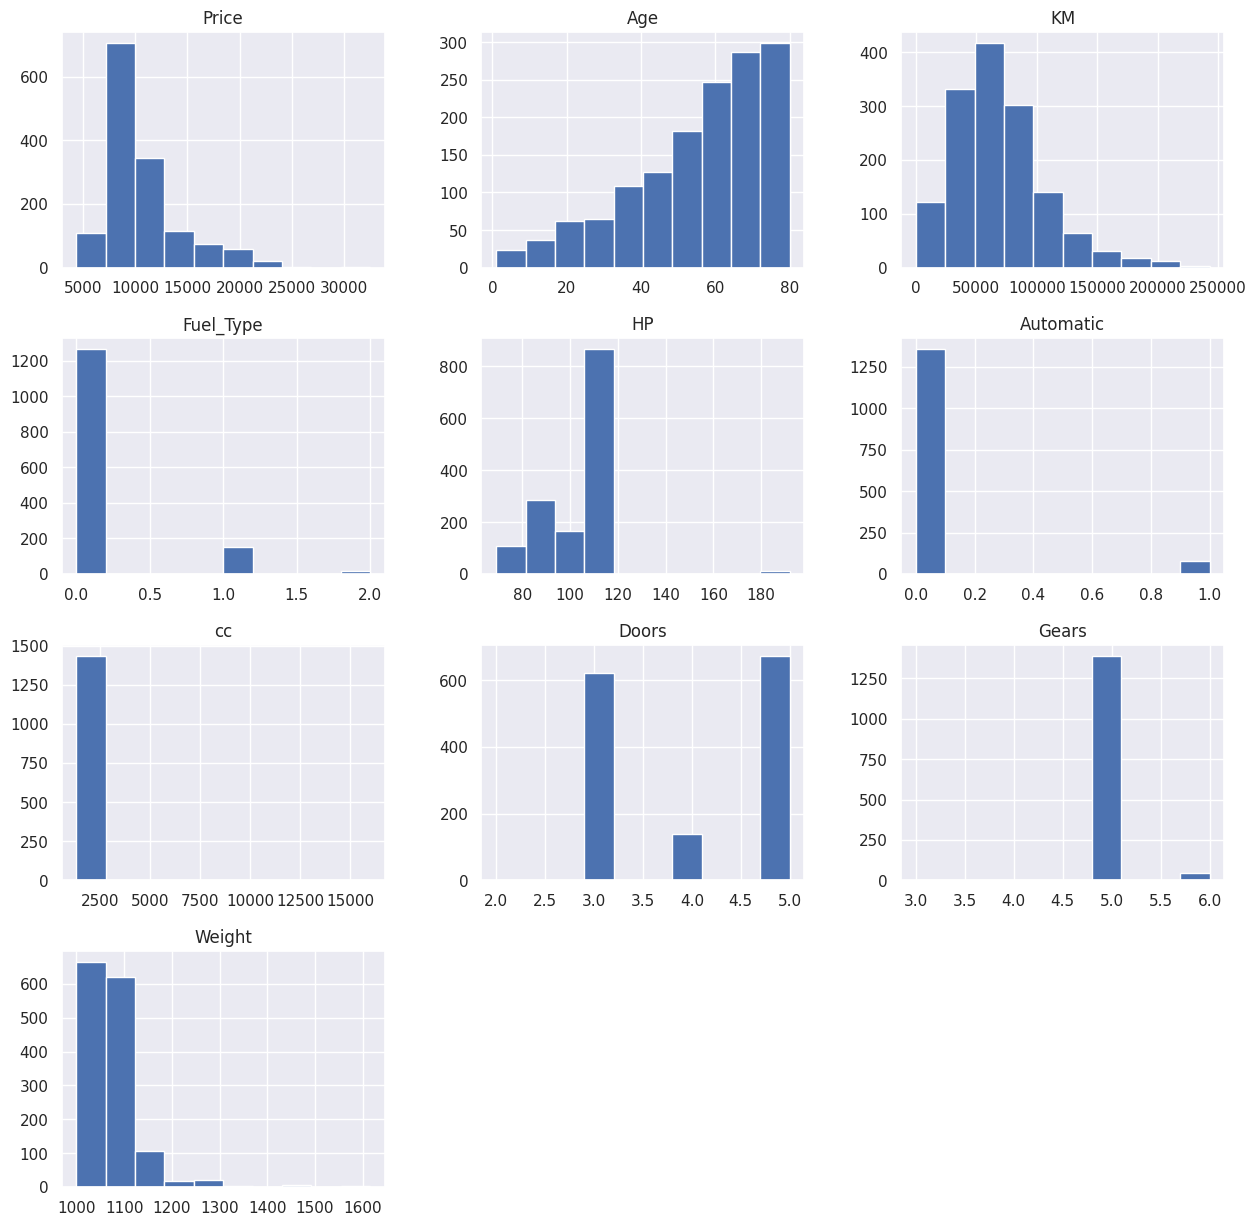

In [22]:
df.hist(figsize=(15,15))

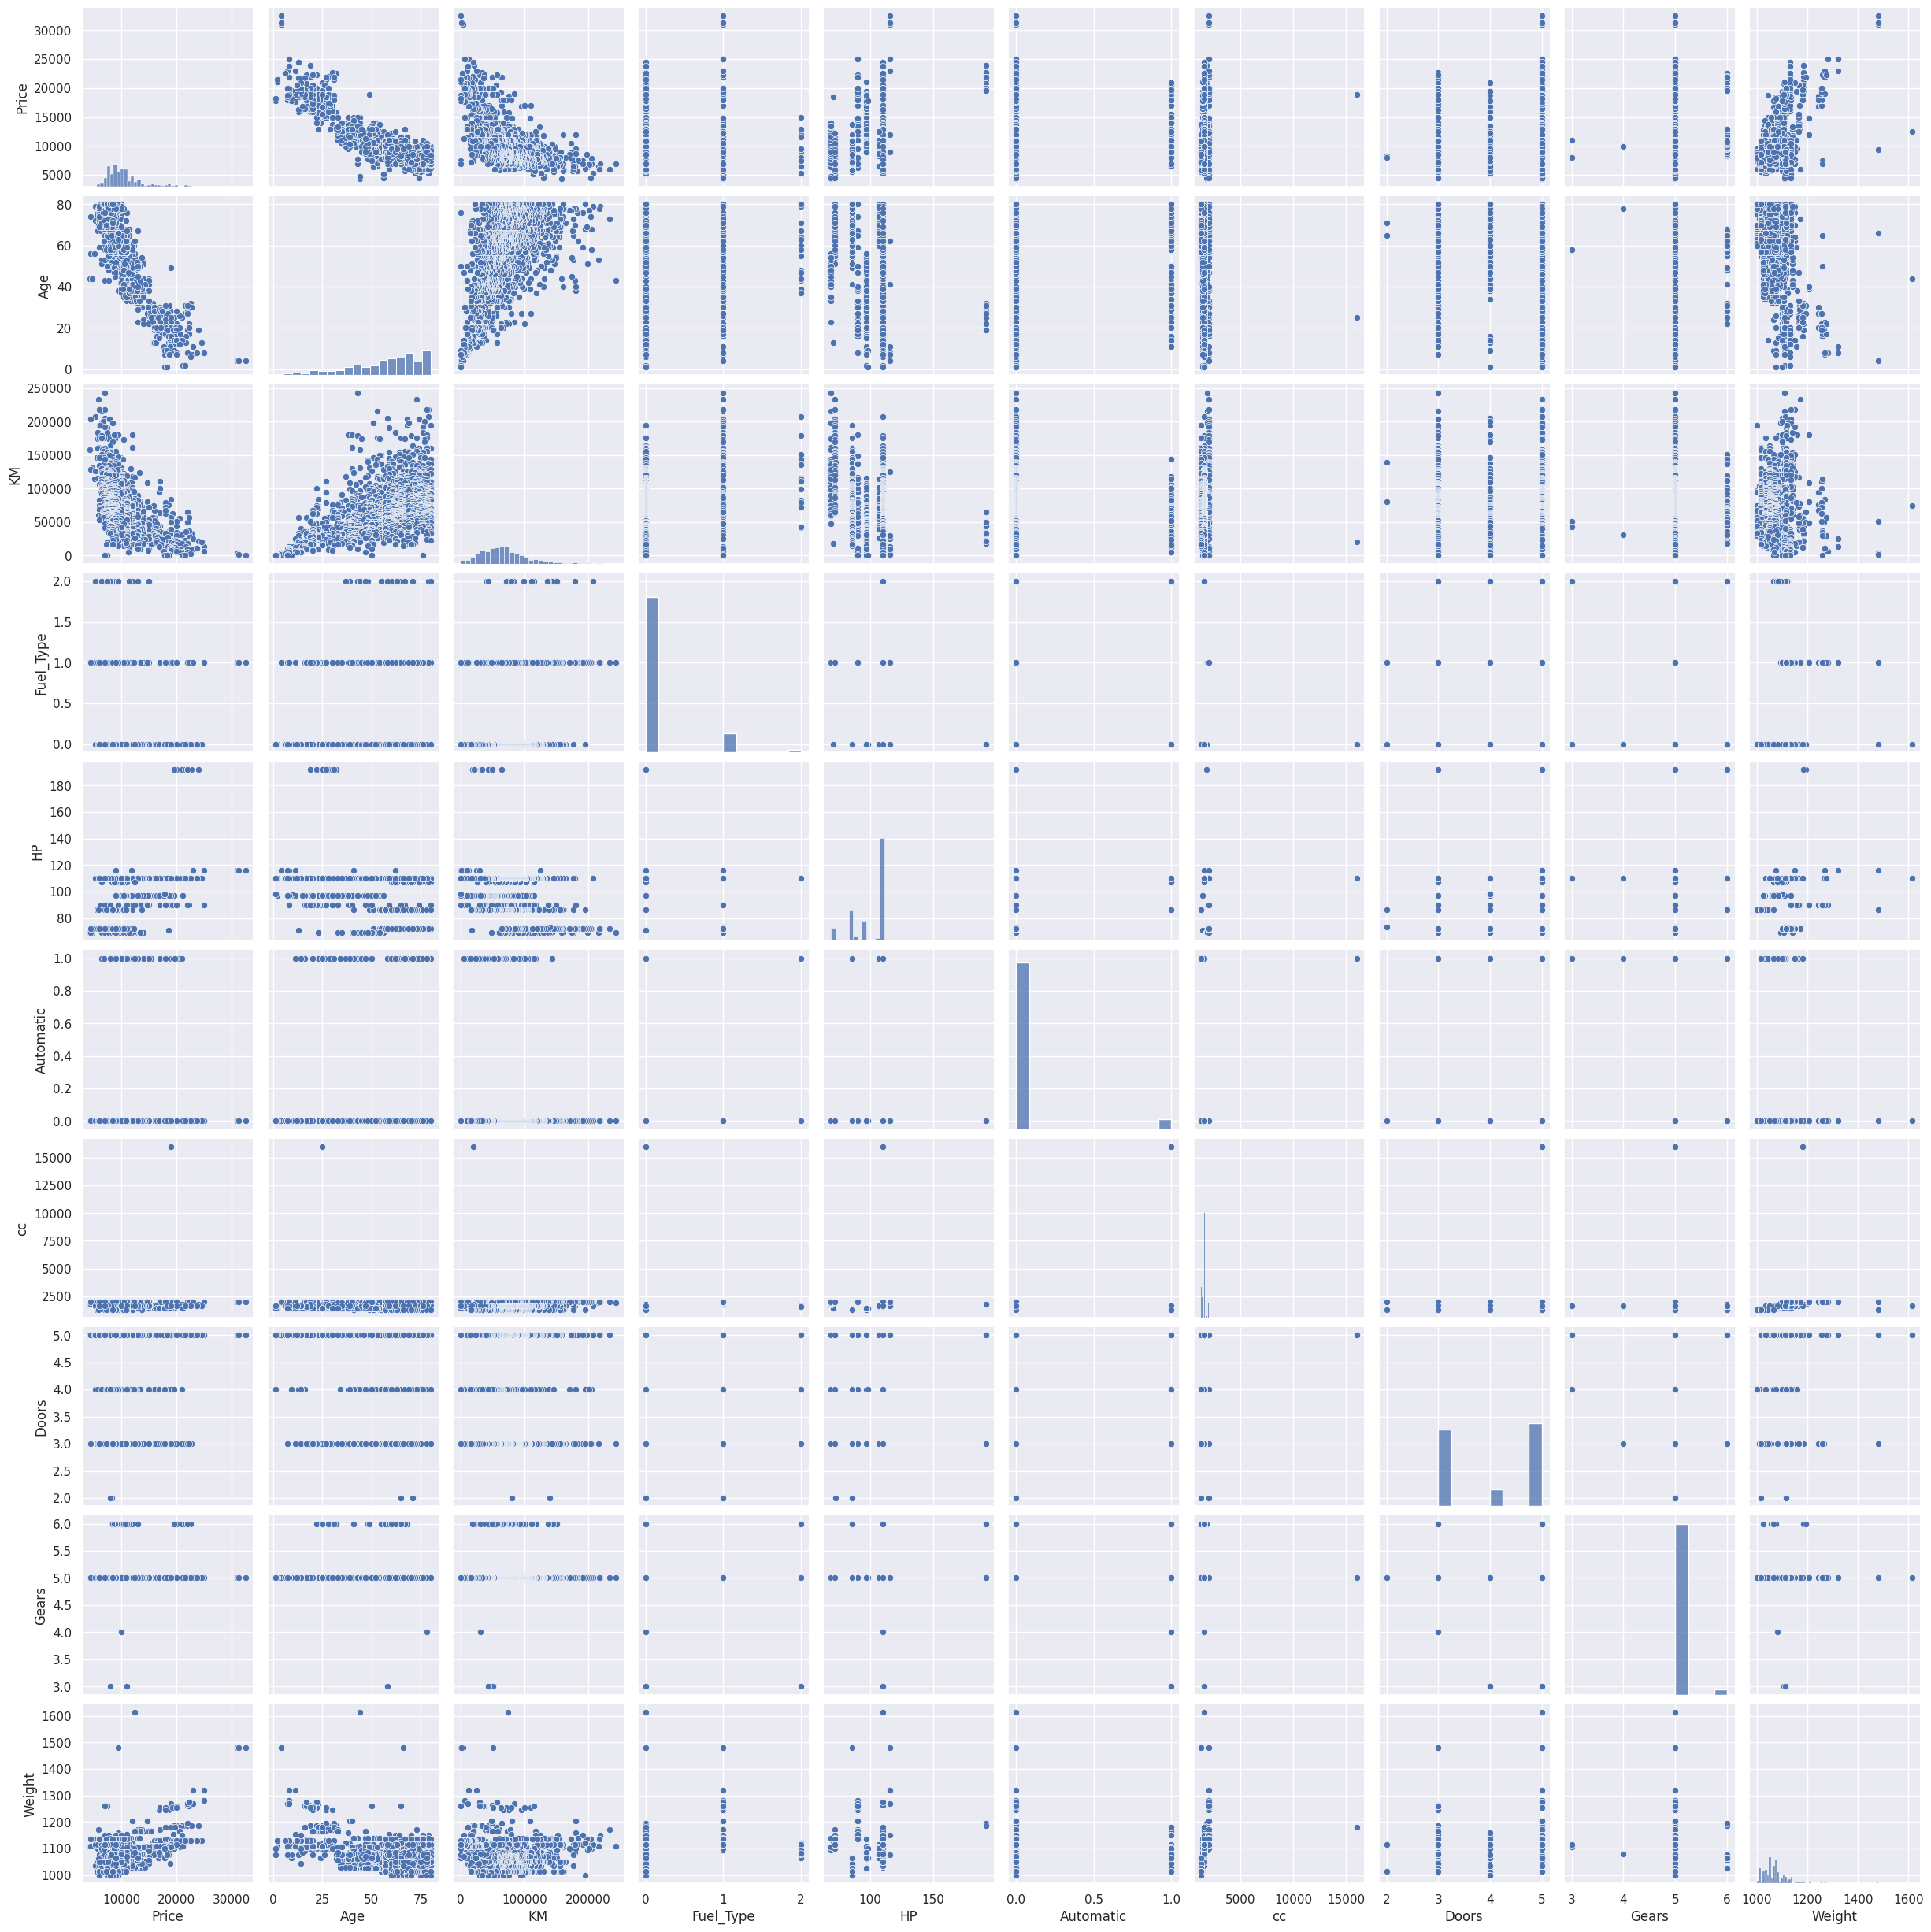

In [23]:
sns.pairplot(df)

<Axes: >

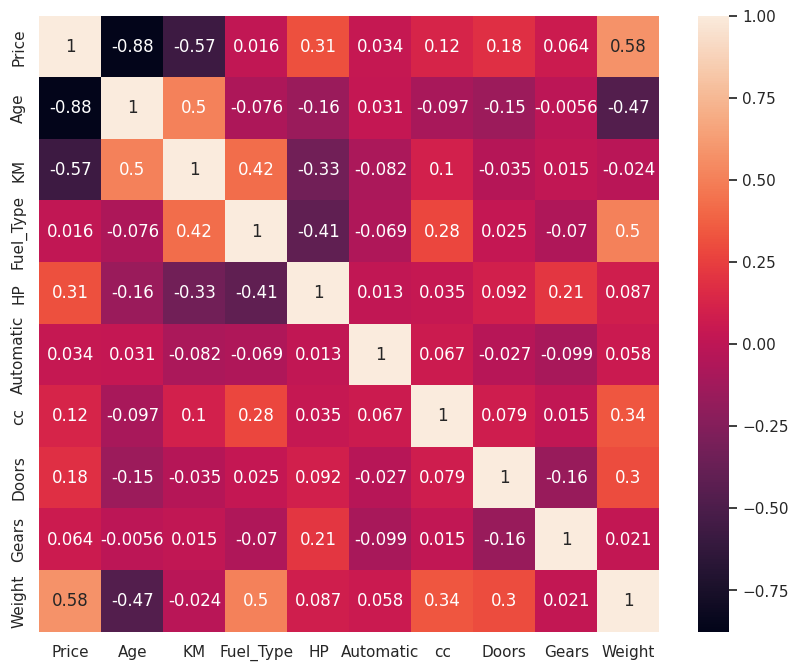

In [24]:
sns.heatmap(df.corr(),annot=True)

In [25]:
# Model Building
model=smf.ols('Price~Age+KM+Fuel_Type+HP+Automatic+cc+Doors+Gears+Weight',data=df).fit()

In [27]:
model.pvalues

,0
Intercept,5.917739e-10
Age,3.728000e-293
KM,4.560948e-38
Fuel_Type,7.138133e-05
HP,4.796786e-16
Automatic,5.306234e-02
cc,5.436426e-01
Doors,4.719094e-01
Gears,1.567914e-03
Weight,2.384319e-79


In [ ]:
# age,km,fuel_type,hp,automatic,cc,doors,gears,weight are all important because all are less than alpha

In [28]:
# Calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [30]:
df.head()

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,5,1165
1,13750,23,72937,1,90,0,2000,3,5,1165
2,13950,24,41711,1,90,0,2000,3,5,1165
3,14950,26,48000,1,90,0,2000,3,5,1165
4,13750,30,38500,1,90,0,2000,3,5,1170


In [32]:
data=df.drop(columns=['Price'])
data

,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,23,46986,1,90,0,2000,3,5,1165
1,23,72937,1,90,0,2000,3,5,1165
2,24,41711,1,90,0,2000,3,5,1165
3,26,48000,1,90,0,2000,3,5,1165
4,30,38500,1,90,0,2000,3,5,1170
...,...,...,...,...,...,...,...,...,...
1431,69,20544,0,86,0,1300,3,5,1025
1432,72,19000,0,86,0,1300,3,5,1015
1433,71,17016,0,86,0,1300,3,5,1015
1434,70,16916,0,86,0,1300,3,5,1015


In [33]:
data.values

array([[   23, 46986,     1, ...,     3,     5,  1165],
       [   23, 72937,     1, ...,     3,     5,  1165],
       [   24, 41711,     1, ...,     3,     5,  1165],
       ...,
       [   71, 17016,     0, ...,     3,     5,  1015],
       [   70, 16916,     0, ...,     3,     5,  1015],
       [   76,     1,     0, ...,     5,     5,  1114]])

In [34]:
vif=pd.DataFrame()
vif

""


In [35]:
vif['Features']=data.columns
vif

,Features
0,Age
1,KM
2,Fuel_Type
3,HP
4,Automatic
5,cc
6,Doors
7,Gears
8,Weight


In [38]:
range(len(data.columns))

range(0, 9)

In [40]:
[variance_inflation_factor(data.values, i) for i in range(data.shape[1])]

[np.float64(16.48580480811752),
 np.float64(8.438107952383358),
 np.float64(2.4502391832739687),
 np.float64(68.32997753941031),
 np.float64(1.1245677217181644),
 np.float64(17.23666214871125),
 np.float64(22.445486043533467),
 np.float64(466.5342999152052),
 np.float64(539.939673233929)]

In [41]:
vif['VIF']=[variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
vif
# Gears and Weight are high VIF values so they are creating multicollinearity Problems

,Features,VIF
0,Age,16.485805
1,KM,8.438108
2,Fuel_Type,2.450239
3,HP,68.329978
4,Automatic,1.124568
5,cc,17.236662
6,Doors,22.445486
7,Gears,466.534300
8,Weight,539.939673


In [ ]:
# Subset Selection

In [42]:
# consider Gear and Exclude Weight
GT=smf.ols('Price~Age+KM+Fuel_Type+HP+Automatic+cc+Doors+Gears',data=df).fit()
GT.rsquared,GT.aic

(np.float64(0.8251161706643262), np.float64(25095.730853761153))

In [43]:
#consider Weight and Exclude Gear
WG=smf.ols('Price~Age+KM+Fuel_Type+HP+Automatic+cc+Doors+Weight',data=df).fit()
WG.rsquared,WG.aic

(np.float64(0.8628037356828113), np.float64(24747.44281567066))

In [ ]:
# rsquared High for Weight and Low Aic for Weight so drop the Gear column

In [ ]:
# Model Validation Technique
# Residual Analysis

In [46]:
# create final model
model=smf.ols('Price~Age+KM+Fuel_Type+HP+Automatic+cc+Doors+Weight',data=df).fit()
model.rsquared

np.float64(0.8628037356828113)

In [47]:
import statsmodels.api as sm

In [48]:
df.head()

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,5,1165
1,13750,23,72937,1,90,0,2000,3,5,1165
2,13950,24,41711,1,90,0,2000,3,5,1165
3,14950,26,48000,1,90,0,2000,3,5,1165
4,13750,30,38500,1,90,0,2000,3,5,1170


In [49]:
model.fittedvalues

,0
0,16309.851543
1,15866.834591
2,16275.970839
3,15920.746040
4,15691.582379
...,...
1431,8685.898478
1432,8131.689169
1433,8289.490341
1434,8415.129209


In [50]:
model.params

,0
Intercept,-5754.214574
Age,-123.931740
KM,-0.017071
Fuel_Type,-612.333052
HP,25.333247
Automatic,250.065616
cc,-0.053312
Doors,-55.461510
Weight,20.877216


In [51]:
model.resid

,0
0,-2809.851543
1,-2116.834591
2,-2325.970839
3,-970.746040
4,-1941.582379
...,...
1431,-1185.898478
1432,2713.310831
1433,210.509659
1434,-1165.129209


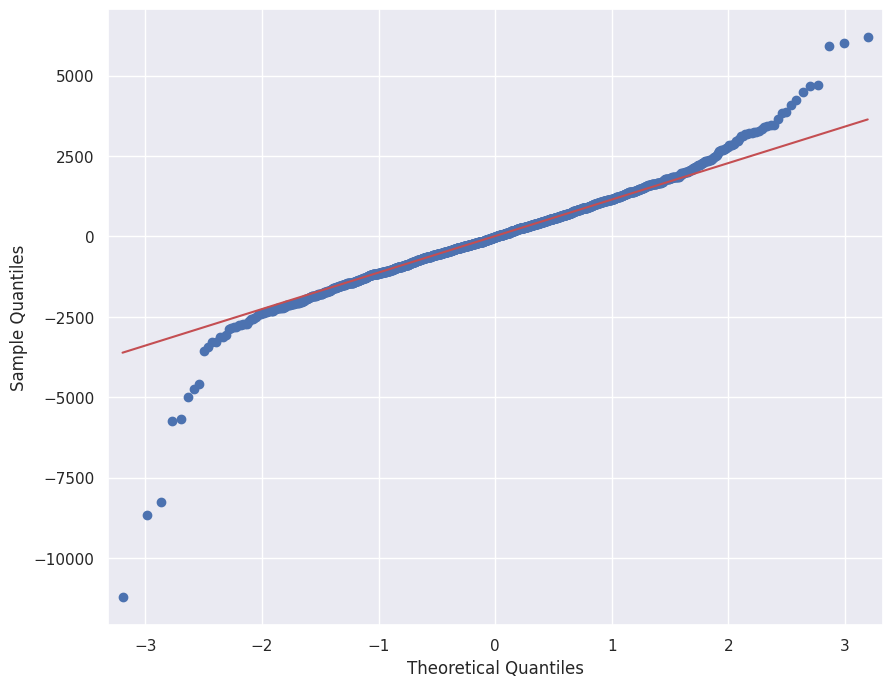

In [52]:
sm.qqplot(model.resid,line='q')
plt.show()

In [53]:
np.argmax(model.resid),np.max(model.resid)

(np.int64(146), 6191.2434084371125)

In [ ]:
# Residual Plot of Homosedasitiy

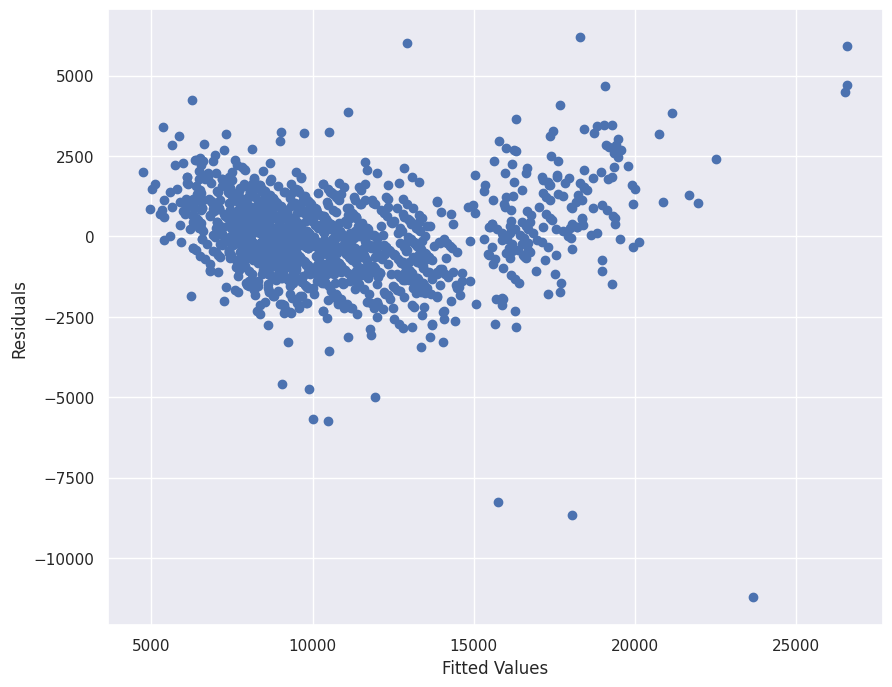

In [54]:
plt.scatter(model.fittedvalues,model.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

In [55]:
# model Deletion Technique
model

In [56]:
inf=model.get_influence()

In [57]:
c,p=inf.cooks_distance

In [58]:
c

array([4.18947974e-03, 2.19861021e-03, 2.95040151e-03, ...,
       1.85811259e-05, 5.56696092e-04, 9.27265975e-03])

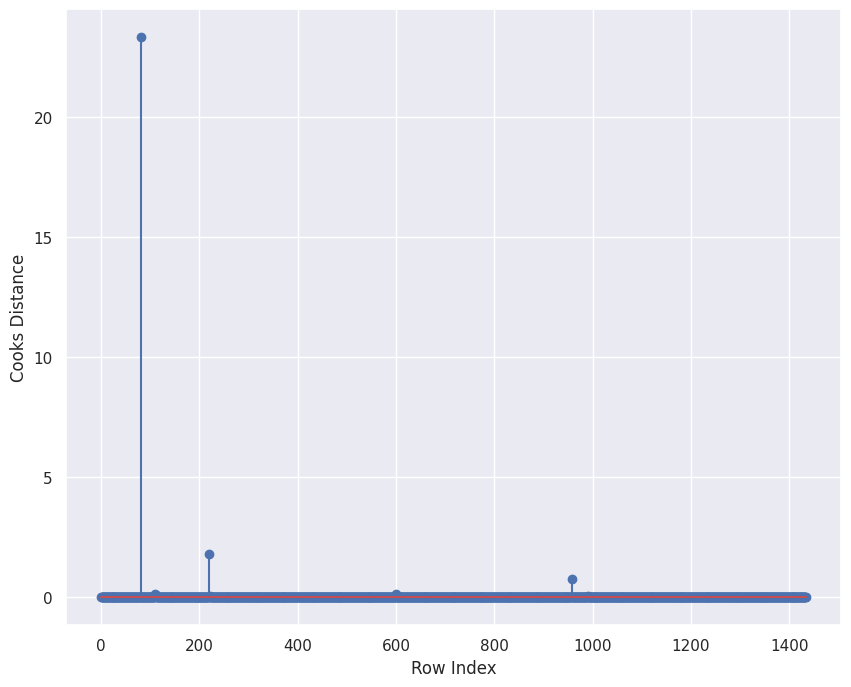

In [59]:
# cooks Distance Plot
plt.stem(c)
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [60]:
np.argmax(c),np.max(c)

(np.int64(80), np.float64(23.31017157833577))

In [61]:
df.iloc[[80]]

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
80,18950,25,20019,0,110,1,16000,5,5,1180


In [62]:
df.head()

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,5,1165
1,13750,23,72937,1,90,0,2000,3,5,1165
2,13950,24,41711,1,90,0,2000,3,5,1165
3,14950,26,48000,1,90,0,2000,3,5,1165
4,13750,30,38500,1,90,0,2000,3,5,1170


In [63]:
df.drop(index=80,inplace=True)

In [64]:
df.reset_index(drop=True,inplace=True)

In [66]:
df.iloc[[80]]

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
80,17250,29,20000,0,110,0,1600,5,5,1115


In [67]:
final_model=smf.ols('Price~Age+KM+Fuel_Type+HP+Automatic+cc+Doors+Weight',data=df).fit()
final_model.rsquared

np.float64(0.8640468187000023)

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X = df.drop(columns=['Price'])
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [81]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

print("Model  Evaluation:")
evaluate(model, X_test, y_test)

print("\nfinal_model  Evaluation:")
evaluate(final_model, X_test, y_test)

Model  Evaluation:
R² Score: 0.8488
RMSE: 1285.58

final_model  Evaluation:
R² Score: 0.8548
RMSE: 1259.79


In [79]:
from sklearn.linear_model import Lasso, Ridge

# Lasso
lasso = Lasso(alpha=0.5)
lasso.fit(X_train, y_train)
print("\nLasso :")
evaluate(lasso, X_test, y_test)

# Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
print("\nRidge :")
evaluate(ridge, X_test, y_test)


Lasso :
R² Score: 0.8523
RMSE: 1270.56

Ridge :
R² Score: 0.8523
RMSE: 1270.64


In [ ]:
'''
1.What is Normalization & Standardization and how is it helpful?

Ans: Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

In [ ]:
'''
2.What techniques can be used to address multicollinearity in multiple linear regression?

Ans:Multicollinearity in multiple linear regression can be addressed by removing high-VIF features, applying regularization techniques like Ridge or Lasso, using PCA to reduce dimensionality, or combining correlated variables into a single feature.

In [ ]:
'''
Summary of Findings
Age, KM, HP, and Weight are strong predictors of price.

Fuel type has a noticeable impact, with Diesel generally priced higher.

Model  offers a good balance between simplicity and performance.

Lasso helps with feature selection; Ridge improves generalization.